<a href="https://colab.research.google.com/github/caevalareti/data-science-projects/blob/master/coffee_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://www.coffeeinstitute.org/wp-content/themes/CQI/images/logo.png" height="100px"></p>

---

> <p align="center">This analysis is gonna cover 1,340 coffee reviews to try to find out which country has the best arabica coffee in the world. These data was collected from the Coffee Quality Institute, a non-profit organization of trained reviewers.</p>

The scraper code and datasets can be found at: https://github.com/jldbc/coffee-quality-database







In [0]:
# importing essential packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

%matplotlib inline

In [0]:
# importing dataset
data = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv')
print('Number of rows:', len(data))
data.head()

Number of rows: 1311


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [0]:
# checking empty data and missing values
df[df.isnull().any(axis=1)]

,Country.of.Origin,Farm.Name,Company,Altitude,Variety,Processing.Method,Color,altitude_mean_meters,Harvest.Year,Grading.Date,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers
0,Ethiopia,metad plc,metad agricultural developmet plc,1950-2200,NaN,Washed / Wet,Green,2075.0,2014,"April 4th, 2015",8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0,0.0
2,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,1600 - 1800 m,Bourbon,NaN,NaN,1700.0,NaN,"May 31st, 2010",8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0,0.0
3,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,1800-2200,NaN,Natural / Dry,Green,2000.0,2014,"March 26th, 2015",8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,2,0.0
5,Brazil,NaN,NaN,NaN,NaN,Natural / Dry,Bluish-Green,NaN,2013,"September 3rd, 2013",8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,0.11,0,1,0.0
6,Peru,NaN,richmond investment-coffee department,NaN,Other,Washed / Wet,Bluish-Green,NaN,2012,"September 17th, 2012",8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.00,10.00,8.50,88.75,0.11,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,United States (Hawaii),NaN,kona pacific farmers cooperative,NaN,Hawaiian Kona,Natural / Dry,Green,NaN,2014,"March 10th, 2014",6.92,6.92,6.92,7.50,7.58,7.17,6.67,6.67,9.33,6.92,72.58,0.11,5,9,0.0
1297,Haiti,2000 farmers,NaN,640m-1400m,NaN,NaN,NaN,1020.0,2010,"August 23rd, 2011",6.92,6.75,7.08,7.17,7.33,6.67,10.00,5.33,8.67,6.42,72.33,0.08,1,0,0.0
1300,Mexico,la morena,NaN,1800,Bourbon,Washed / Wet,Green,1800.0,2012,"July 11th, 2012",6.50,6.67,6.42,7.17,7.33,6.50,8.00,6.00,10.00,6.42,71.00,0.11,0,0,0.0
1302,Brazil,NaN,volcafe ltda.,NaN,NaN,Natural / Dry,Green,NaN,2017 / 2018,"October 27th, 2017",7.00,7.00,6.83,7.00,7.33,6.83,6.00,6.00,10.00,6.67,70.67,0.11,0,55,1.0


The sample is pretty much complete. 

We do not have critical missing data so we will analyse the whole dataset.

In [0]:
# analysing all columns in dataset
data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [0]:
# selecting columns that really matter for the analysis
df = data[['Country.of.Origin', 'Farm.Name','Company','Altitude','Variety', 'Processing.Method', 'Color',\
   'altitude_mean_meters', 'Harvest.Year', 'Grading.Date',
   'Aroma', 'Flavor','Aftertaste','Acidity', 'Body',
   'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
   'Total.Cup.Points', 'Moisture', 'Category.One.Defects',  'Category.Two.Defects', 'Quakers']].copy()

In [0]:
# ordering grades according to their countries 
countries = list(df.groupby('Country.of.Origin').size().sort_values(ascending = False).index)
ind= df['Country.of.Origin'].apply(lambda x: x in countries)

In [0]:
# display selected data
df.head()

,Country.of.Origin,Farm.Name,Company,Altitude,Variety,Processing.Method,Color,altitude_mean_meters,Harvest.Year,Grading.Date,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers
0,Ethiopia,metad plc,metad agricultural developmet plc,1950-2200,NaN,Washed / Wet,Green,2075.0,2014,"April 4th, 2015",8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0,0.0
1,Ethiopia,metad plc,metad agricultural developmet plc,1950-2200,Other,Washed / Wet,Green,2075.0,2014,"April 4th, 2015",8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,1,0.0
2,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,1600 - 1800 m,Bourbon,NaN,NaN,1700.0,NaN,"May 31st, 2010",8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0,0.0
3,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,1800-2200,NaN,Natural / Dry,Green,2000.0,2014,"March 26th, 2015",8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,2,0.0
4,Ethiopia,metad plc,metad agricultural developmet plc,1950-2200,Other,Washed / Wet,Green,2075.0,2014,"April 4th, 2015",8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,2,0.0


In [0]:
# ordering final grade
df[ind].groupby('Country.of.Origin')['Total.Cup.Points'].median().sort_values(ascending = False)

Country.of.Origin
United States                   87.165
Papua New Guinea                85.750
Ethiopia                        85.205
Japan                           84.670
Kenya                           84.580
Panama                          84.125
Uganda                          83.875
Ecuador                         83.830
Costa Rica                      83.250
Colombia                        83.250
China                           83.170
Vietnam                         82.830
Rwanda                          82.830
El Salvador                     82.830
Peru                            82.795
United States (Hawaii)          82.750
Thailand                        82.670
Indonesia                       82.665
Guatemala                       82.500
Brazil                          82.420
Tanzania, United Republic Of    82.170
United States (Puerto Rico)     82.040
Taiwan                          82.000
Laos                            82.000
Zambia                          81.920
Burundi

In [0]:
# ordering Aroma
df[ind].groupby('Country.of.Origin')['Aroma'].median().sort_values(ascending = False)

Country.of.Origin
Papua New Guinea                8.330
United States                   8.000
Uganda                          7.920
Rwanda                          7.830
Kenya                           7.830
Ethiopia                        7.830
Japan                           7.750
Panama                          7.710
Indonesia                       7.710
Costa Rica                      7.670
El Salvador                     7.670
Colombia                        7.670
China                           7.670
Peru                            7.670
United States (Puerto Rico)     7.670
India                           7.670
Zambia                          7.670
Guatemala                       7.580
Malawi                          7.580
Tanzania, United Republic Of    7.580
Vietnam                         7.580
Brazil                          7.500
Ecuador                         7.500
United States (Hawaii)          7.500
Mexico                          7.500
Thailand                        

In [0]:
# ordering Flavor
df[ind].groupby('Country.of.Origin')['Flavor'].median().sort_values(ascending = False)

Country.of.Origin
Papua New Guinea                8.420
United States                   8.290
Ethiopia                        7.960
Rwanda                          7.920
Kenya                           7.830
Uganda                          7.750
Japan                           7.750
Ecuador                         7.670
China                           7.670
El Salvador                     7.670
Peru                            7.665
United States (Puerto Rico)     7.625
Panama                          7.585
Indonesia                       7.580
Brazil                          7.580
Colombia                        7.580
United States (Hawaii)          7.580
Thailand                        7.540
Costa Rica                      7.500
Taiwan                          7.500
Laos                            7.500
Guatemala                       7.500
Burundi                         7.460
Honduras                        7.420
Malawi                          7.420
Vietnam                         

In [0]:
# ordering Aftertaste
df[ind].groupby('Country.of.Origin')['Aftertaste'].median().sort_values(ascending = False)

Country.of.Origin
United States                   8.125
Ethiopia                        7.830
Papua New Guinea                7.830
Rwanda                          7.750
Kenya                           7.750
Japan                           7.750
United States (Puerto Rico)     7.670
Panama                          7.665
Colombia                        7.580
Uganda                          7.580
Ecuador                         7.580
Peru                            7.540
Thailand                        7.500
Costa Rica                      7.500
United States (Hawaii)          7.500
El Salvador                     7.500
China                           7.460
Indonesia                       7.460
Zambia                          7.420
Brazil                          7.420
Philippines                     7.420
Tanzania, United Republic Of    7.420
Guatemala                       7.330
Taiwan                          7.330
Malawi                          7.330
Laos                            

In [0]:
# ordering Acidity
df[ind].groupby('Country.of.Origin')['Acidity'].median().sort_values(ascending = False)

Country.of.Origin
Papua New Guinea                8.330
United States                   8.170
Ethiopia                        8.000
Rwanda                          7.830
Kenya                           7.750
Ecuador                         7.750
Peru                            7.710
Panama                          7.705
United States (Hawaii)          7.670
Uganda                          7.670
Costa Rica                      7.670
El Salvador                     7.670
China                           7.625
United States (Puerto Rico)     7.625
Guatemala                       7.580
Colombia                        7.580
Indonesia                       7.580
Thailand                        7.540
Brazil                          7.500
Vietnam                         7.500
Tanzania, United Republic Of    7.460
Honduras                        7.420
Malawi                          7.420
Japan                           7.420
Mexico                          7.420
Myanmar                         

In [0]:
# ordering Body
df[ind].groupby('Country.of.Origin')['Body'].median().sort_values(ascending = False)

Country.of.Origin
Japan                           8.080
United States                   8.040
Papua New Guinea                8.000
Ethiopia                        7.920
Peru                            7.920
Ecuador                         7.830
Zambia                          7.750
Rwanda                          7.750
Kenya                           7.750
Colombia                        7.670
Uganda                          7.670
United States (Hawaii)          7.670
United States (Puerto Rico)     7.665
China                           7.625
Panama                          7.585
Thailand                        7.580
El Salvador                     7.580
Vietnam                         7.580
Indonesia                       7.580
Guatemala                       7.500
Costa Rica                      7.500
Brazil                          7.500
Taiwan                          7.500
Tanzania, United Republic Of    7.500
Laos                            7.420
Honduras                        

In [0]:
# ordering Balance
df[ind].groupby('Country.of.Origin')['Balance'].median().sort_values(ascending = False)

Country.of.Origin
Papua New Guinea                8.250
United States                   8.040
Ethiopia                        7.920
Panama                          7.875
Ecuador                         7.830
Japan                           7.830
United States (Puerto Rico)     7.750
Kenya                           7.750
Rwanda                          7.750
United States (Hawaii)          7.670
Uganda                          7.670
El Salvador                     7.670
Colombia                        7.670
Costa Rica                      7.670
China                           7.625
Peru                            7.580
Indonesia                       7.540
Guatemala                       7.500
Philippines                     7.500
Laos                            7.500
Thailand                        7.500
Brazil                          7.500
Tanzania, United Republic Of    7.460
Zambia                          7.420
India                           7.420
Vietnam                         

In [0]:
# ordering Uniformity
df[ind].groupby('Country.of.Origin')['Uniformity'].median().sort_values(ascending = False)

Country.of.Origin
Zambia                          10.000
Guatemala                       10.000
Laos                            10.000
Kenya                           10.000
Japan                           10.000
Indonesia                       10.000
Honduras                        10.000
Haiti                           10.000
Ethiopia                        10.000
Mauritius                       10.000
El Salvador                     10.000
Ecuador                         10.000
Costa Rica                      10.000
Colombia                        10.000
China                           10.000
Burundi                         10.000
Vietnam                         10.000
Malawi                          10.000
Mexico                          10.000
Myanmar                         10.000
United States (Hawaii)          10.000
United States                   10.000
Uganda                          10.000
Thailand                        10.000
Tanzania, United Republic Of    10.000
Taiwan 

In [0]:
# ordering Cupper Points
df[ind].groupby('Country.of.Origin')['Cupper.Points'].median().sort_values(ascending = False)

Country.of.Origin
United States                   8.170
Japan                           8.080
Ethiopia                        8.000
Rwanda                          8.000
Papua New Guinea                7.920
Kenya                           7.830
Panama                          7.705
Uganda                          7.670
Vietnam                         7.670
Ecuador                         7.670
Costa Rica                      7.670
China                           7.670
United States (Puerto Rico)     7.585
Colombia                        7.580
United States (Hawaii)          7.580
El Salvador                     7.580
Burundi                         7.580
Indonesia                       7.540
Peru                            7.500
Thailand                        7.500
Laos                            7.500
Tanzania, United Republic Of    7.500
Brazil                          7.500
Guatemala                       7.420
India                           7.420
Malawi                          

In [0]:
# separating essential characteristics in an array
characteristics = np.array(['Aroma', 'Flavor','Aftertaste','Acidity', 'Body',
   'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points'])
stats=df.loc[36, characteristics].values

In [0]:
# setting graph angles
angles=np.linspace(0, 2*np.pi, len(characteristics), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

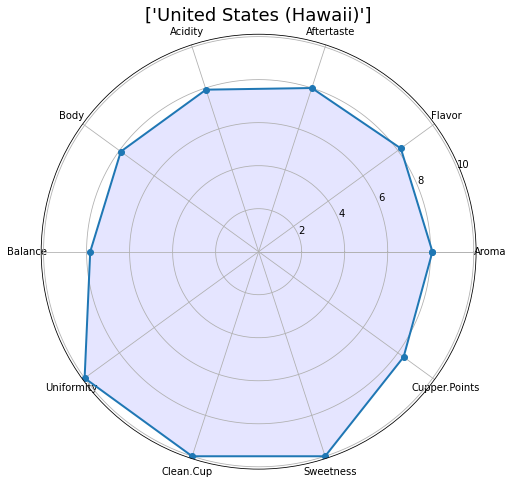

In [0]:
# plotting aka chart with matplotlib
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, polar=True)
ax.plot(angles, stats, 'o', linewidth=2, linestyle='solid')
ax.fill(angles, stats,'b', alpha=0.1)
ax.set_thetagrids(angles * 180/np.pi, characteristics)
ax.set_title([df.loc[37,"Country.of.Origin"]], y=1, fontdict={'fontsize': 18})

ax.grid(True)

In [4]:
# importing dataset for Robusta analysis
rb = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv')
rb.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Fragrance...Aroma,Flavor,Aftertaste,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,Clean.Cup,Balance,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,sheema south western,Ankole coffee producers coop,300,60 kg,Uganda Coffee Development Authority,2013,"June 26th, 2014",Ankole coffee producers coop,NaN,NaN,7.83,8.08,7.75,7.92,8.00,8.25,10.0,10.0,7.92,8.00,83.75,0.12,0,0,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
1,2,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,chikmagalur karnataka indua,Nishant Gurjer Kaapi Royale,320,60 kg,Specialty Coffee Association,2017,"October 31st, 2017",Nishant Gurjer,NaN,Washed / Wet,8.00,7.75,7.92,8.00,8.00,7.92,10.0,10.0,7.92,8.00,83.50,0.00,0,0,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0
2,3,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0000,sethuraman estate,1000m,chikmagalur,Nishant Gurjer,300,2 kg,Specialty Coffee Association,2015,"April 30th, 2015",Andrew Hetzel,NaN,NaN,7.92,7.83,7.92,8.00,7.83,7.83,10.0,10.0,7.92,8.00,83.25,0.00,0,0,Green,0,"April 29th, 2016",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.0,1000.0,1000.0
3,4,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,central,UGACOF,320,60 kg,Uganda Coffee Development Authority,2013,"July 14th, 2014",UGACOF,NaN,NaN,8.00,7.92,7.92,7.75,7.75,7.83,10.0,10.0,7.75,8.08,83.00,0.12,0,0,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1212.0,1212.0,1212.0
4,5,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,Katuka Development Trust Ltd,1,60 kg,Uganda Coffee Development Authority,2013,"June 26th, 2014",Katuka Development Trust Ltd,NaN,NaN,8.33,7.83,7.83,7.75,7.58,8.25,10.0,10.0,7.75,7.67,83.00,0.12,0,0,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0


In [5]:
# analysing data columns
rb.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Fragrance...Aroma', 'Flavor', 'Aftertaste',
       'Salt...Acid', 'Bitter...Sweet', 'Mouthfeel', 'Uniform.Cup',
       'Clean.Cup', 'Balance', 'Cupper.Points', 'Total.Cup.Points', 'Moisture',
       'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects',
       'Expiration', 'Certification.Body', 'Certification.Address',
       'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [0]:
# selecting columns that really matter for the analysis
df_rb = rb[['Country.of.Origin', 'Fragrance...Aroma', 'Flavor', 'Aftertaste',
       'Salt...Acid', 'Bitter...Sweet', 'Mouthfeel', 'Uniform.Cup',
       'Clean.Cup', 'Balance', 'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Color']].copy()

In [0]:
# ordering Robusta grades according to their countries 
countries_rb = list(df_rb.groupby('Country.of.Origin').size().sort_values(ascending = False).index)
ind_rb= df_rb['Country.of.Origin'].apply(lambda x: x in countries_rb)

In [13]:
df_rb.head()

,Country.of.Origin,Fragrance...Aroma,Flavor,Aftertaste,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,Clean.Cup,Balance,Cupper.Points,Total.Cup.Points,Moisture,Color
0,Uganda,7.83,8.08,7.75,7.92,8.00,8.25,10.0,10.0,7.92,8.00,83.75,0.12,Green
1,India,8.00,7.75,7.92,8.00,8.00,7.92,10.0,10.0,7.92,8.00,83.50,0.00,NaN
2,India,7.92,7.83,7.92,8.00,7.83,7.83,10.0,10.0,7.92,8.00,83.25,0.00,Green
3,Uganda,8.00,7.92,7.92,7.75,7.75,7.83,10.0,10.0,7.75,8.08,83.00,0.12,Green
4,Uganda,8.33,7.83,7.83,7.75,7.58,8.25,10.0,10.0,7.75,7.67,83.00,0.12,Green


In [14]:
# ordering final grade
df_rb[ind_rb].groupby('Country.of.Origin')['Total.Cup.Points'].median().sort_values(ascending = False)

Country.of.Origin
Uganda           81.625
India            81.580
Ecuador          78.415
United States    78.250
Vietnam          73.750
Name: Total.Cup.Points, dtype: float64

In [16]:
# ordering Aroma
df_rb[ind_rb].groupby('Country.of.Origin')['Fragrance...Aroma'].median().sort_values(ascending = False)

Country.of.Origin
Uganda           7.830
India            7.670
United States    7.625
Ecuador          7.625
Vietnam          6.750
Name: Fragrance...Aroma, dtype: float64

In [17]:
# ordering Flavor
df_rb[ind_rb].groupby('Country.of.Origin')['Flavor'].median().sort_values(ascending = False)

Country.of.Origin
Uganda           7.790
India            7.750
Ecuador          7.625
United States    7.415
Vietnam          6.670
Name: Flavor, dtype: float64

In [18]:
# ordering Aftertaste
df_rb[ind_rb].groupby('Country.of.Origin')['Aftertaste'].median().sort_values(ascending = False)

Country.of.Origin
Uganda           7.750
India            7.670
Ecuador          7.540
United States    7.295
Vietnam          6.500
Name: Aftertaste, dtype: float64

In [19]:
# ordering Salt...Acid
df_rb[ind_rb].groupby('Country.of.Origin')['Salt...Acid'].median().sort_values(ascending = False)

Country.of.Origin
India            7.830
Uganda           7.750
Ecuador          7.665
United States    7.420
Vietnam          6.830
Name: Salt...Acid, dtype: float64

In [24]:
# ordering Bitter...Sweet
df_rb[ind_rb].groupby('Country.of.Origin')['Bitter...Sweet'].median().sort_values(ascending = False)

Country.of.Origin
Ecuador          8.085
India            7.750
Uganda           7.710
United States    7.500
Vietnam          6.670
Name: Bitter...Sweet, dtype: float64

In [23]:
# ordering Mouthfeel
df_rb[ind_rb].groupby('Country.of.Origin')['Mouthfeel'].median().sort_values(ascending = False)

Country.of.Origin
India            7.750
Uganda           7.710
United States    7.460
Vietnam          6.920
Ecuador          5.125
Name: Mouthfeel, dtype: float64

In [25]:
# ordering Balance
df_rb[ind_rb].groupby('Country.of.Origin')['Balance'].median().sort_values(ascending = False)

Country.of.Origin
India            7.750
Uganda           7.670
United States    7.295
Vietnam          6.830
Ecuador          6.540
Name: Balance, dtype: float64

In [0]:
# separating essential characteristics in an array
characteristics_rb = np.array(['Bitter...Sweet', 'Mouthfeel','Aftertaste','Salt...Acid', 'Balance',
   'Flavor', 'Fragrance...Aroma'])
stats_rb=df_rb.loc[5, characteristics_rb].values

In [0]:
# setting graph angles
angles=np.linspace(0, 2*np.pi, len(characteristics_rb), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

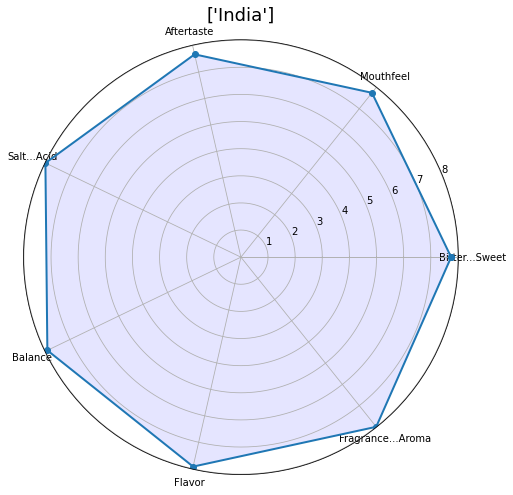

In [33]:
# plotting aka chart with matplotlib
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, polar=True)
ax.plot(angles, stats, 'o', linewidth=2, linestyle='solid')
ax.fill(angles, stats,'b', alpha=0.1)
ax.set_thetagrids(angles * 180/np.pi, characteristics_rb)
ax.set_title([df_rb.loc[5,"Country.of.Origin"]], y=1, fontdict={'fontsize': 18})

ax.grid(True)